In [1]:
import face_recognition
from PIL import Image, ImageDraw

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("data/img3.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image, model="large")

pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, "RGBA")

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks["left_eyebrow"], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks["right_eyebrow"], fill=(68, 54, 39, 128))
    d.line(face_landmarks["left_eyebrow"], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks["right_eyebrow"], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks["top_lip"], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks["bottom_lip"], fill=(150, 0, 0, 128))
    d.line(face_landmarks["top_lip"], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks["bottom_lip"], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks["left_eye"], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks["right_eye"], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(
        face_landmarks["left_eye"] + [face_landmarks["left_eye"][0]],
        fill=(0, 0, 0, 110),
        width=6,
    )
    d.line(
        face_landmarks["right_eye"] + [face_landmarks["right_eye"][0]],
        fill=(0, 0, 0, 110),
        width=6,
    )

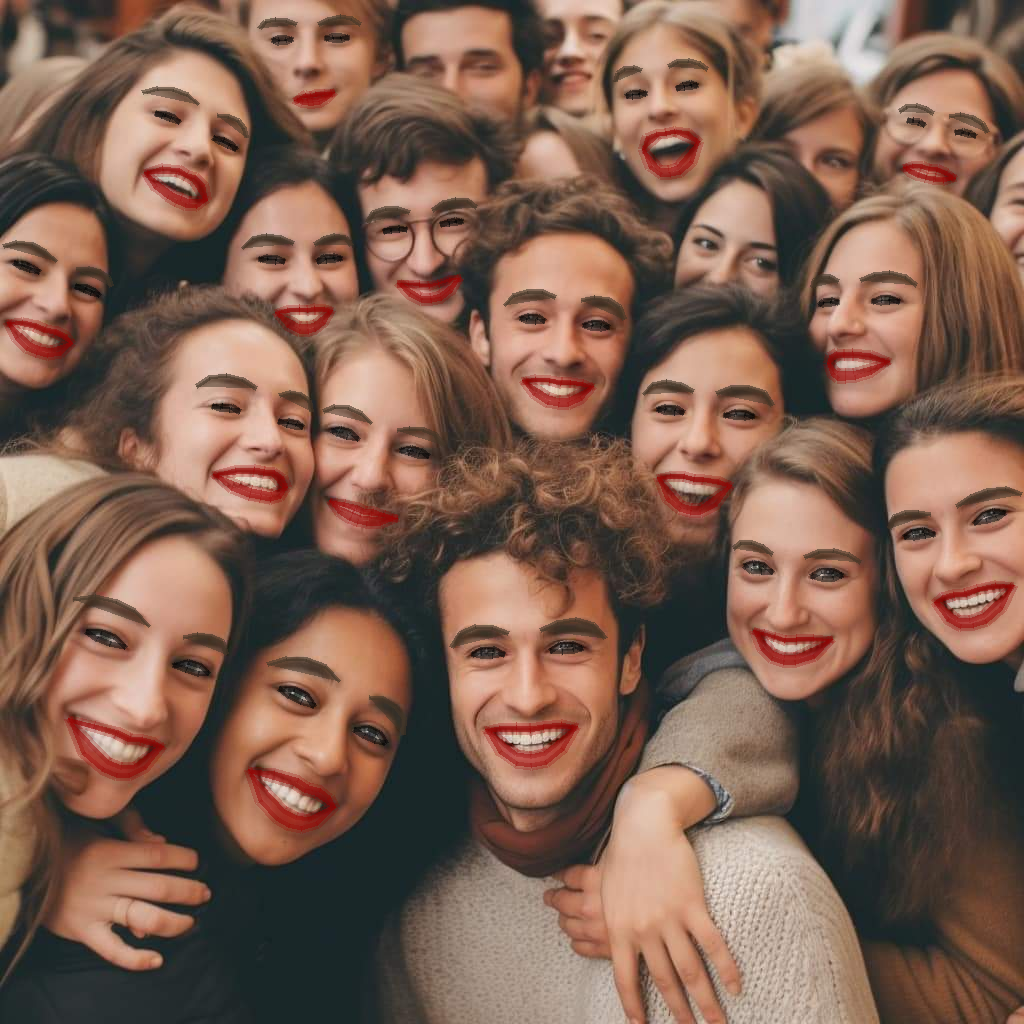

In [2]:
pil_image

In [3]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("data/img3.jpg")

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(
    image, number_of_times_to_upsample=0
)  # , model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print(
        "A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(
            top, left, bottom, right
        )
    )

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)

I found 18 face(s) in this photograph.
A face is located at pixel location Top: 591, Left: 424, Bottom: 806, Right: 639
A face is located at pixel location Top: 277, Left: 493, Bottom: 427, Right: 642
A face is located at pixel location Top: 639, Left: 209, Bottom: 854, Right: 424
A face is located at pixel location Top: 244, Left: 775, Bottom: 394, Right: 924
A face is located at pixel location Top: 0, Left: 245, Bottom: 120, Right: 369
A face is located at pixel location Top: 591, Left: 18, Bottom: 806, Right: 233
A face is located at pixel location Top: 333, Left: 174, Bottom: 512, Right: 353
A face is located at pixel location Top: 360, Left: 626, Bottom: 510, Right: 775
A face is located at pixel location Top: 78, Left: 112, Bottom: 228, Right: 261
A face is located at pixel location Top: 526, Left: 709, Bottom: 676, Right: 858
A face is located at pixel location Top: 473, Left: 871, Bottom: 652, Right: 1024
A face is located at pixel location Top: 51, Left: 604, Bottom: 176, Righ